In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the main dataset
file_path = 'Akshaya_Import_Data_File.csv'
df = pd.read_csv(file_path)

# Clean the columns
df.columns = df.columns.str.strip()
df.rename(columns={'Date': 'Year'}, inplace=True)

# Remove commas from numeric columns
df['Trade Value 1000USD'] = df['Trade Value 1000USD'].str.replace(',', '')
df['Quantity (Kg)'] = df['Quantity (Kg)'].str.replace(',', '')

# Convert to numeric
df['Trade Value 1000USD'] = pd.to_numeric(df['Trade Value 1000USD'])
df['Quantity (Kg)'] = pd.to_numeric(df['Quantity (Kg)'])

# Check
print(df.head())

   Year  Tariff (%)  Trade Value 1000USD  Quantity (Kg)
0  1995        65.0            497894.50      791773000
1  1996        70.0            620678.95     1053390000
2  1997        70.0            595391.42     1012870000
3  1998        65.0           1101471.23     1600070000
4  1999        65.0           1190880.91     2770970000


In [5]:
# Create a new DataFrame for Soyoil Price
soyoil_price = {
    1995:550, 1996:570, 1997:590, 1998:610, 1999:630,
    2000:650, 2001:670, 2002:690, 2003:710, 2004:730,
    2005:750, 2006:770, 2007:790, 2008:810, 2009:830,
    2010:850, 2011:870, 2012:890, 2013:910, 2014:930,
    2015:950, 2016:970, 2017:990, 2018:1010, 2019:1030,
    2020:1050, 2021:1070, 2022:1090
}

# Convert to DataFrame
soyoil_df = pd.DataFrame(list(soyoil_price.items()), columns=['Year', 'Soyoil Price (USD/MT)'])

# Merge with your main dataset
df = pd.merge(df, soyoil_df, on='Year')

# Check merged data
print(df.head())

   Year  Tariff (%)  Trade Value 1000USD  Quantity (Kg)  Soyoil Price (USD/MT)
0  1995        65.0            497894.50      791773000                    550
1  1996        70.0            620678.95     1053390000                    570
2  1997        70.0            595391.42     1012870000                    590
3  1998        65.0           1101471.23     1600070000                    610
4  1999        65.0           1190880.91     2770970000                    630


In [7]:
# Independent variables: Tariff (%) and Soyoil Price
X = df[['Tariff (%)', 'Soyoil Price (USD/MT)']]

# Dependent variable
y = df['Trade Value 1000USD']

# Add constant
X_const = sm.add_constant(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 22, Testing samples: 6


In [11]:
# Build OLS Model
model = sm.OLS(y_train, X_train).fit()

# Print Model Summary
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Trade Value 1000USD   R-squared:                       0.520
Model:                             OLS   Adj. R-squared:                  0.469
Method:                  Least Squares   F-statistic:                     10.29
Date:                 Sat, 26 Apr 2025   Prob (F-statistic):           0.000938
Time:                         11:19:36   Log-Likelihood:                -320.39
No. Observations:                   22   AIC:                             646.8
Df Residuals:                       19   BIC:                             650.1
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

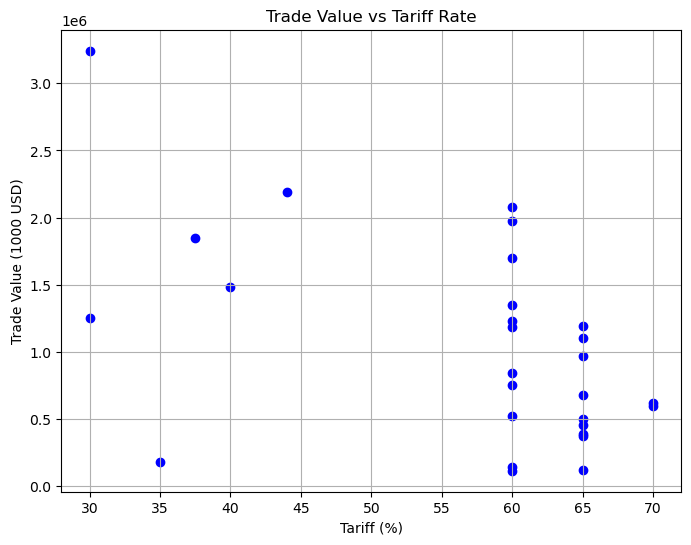

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(df['Tariff (%)'], df['Trade Value 1000USD'], color='blue')
plt.title('Trade Value vs Tariff Rate')
plt.xlabel('Tariff (%)')
plt.ylabel('Trade Value (1000 USD)')
plt.grid(True)
plt.show()

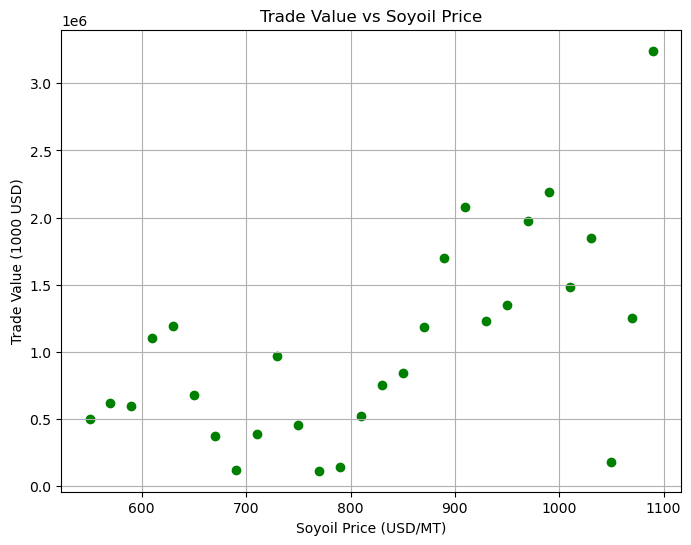

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(df['Soyoil Price (USD/MT)'], df['Trade Value 1000USD'], color='green')
plt.title('Trade Value vs Soyoil Price')
plt.xlabel('Soyoil Price (USD/MT)')
plt.ylabel('Trade Value (1000 USD)')
plt.grid(True)
plt.show()

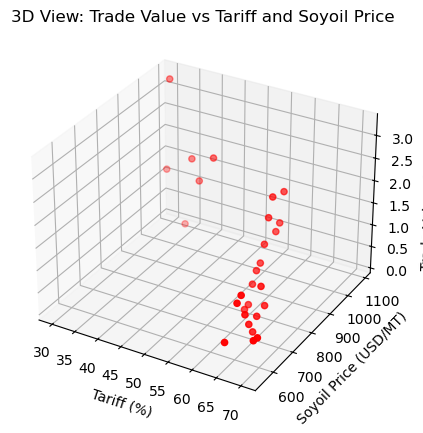

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Tariff (%)'], df['Soyoil Price (USD/MT)'], df['Trade Value 1000USD'], c='red', marker='o')

ax.set_xlabel('Tariff (%)')
ax.set_ylabel('Soyoil Price (USD/MT)')
ax.set_zlabel('Trade Value (1000 USD)')

ax.set_title('3D View: Trade Value vs Tariff and Soyoil Price')
plt.show()

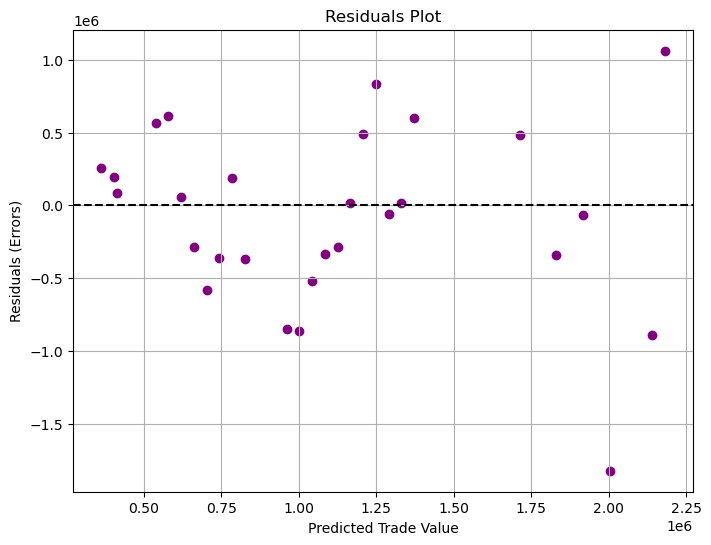

In [24]:
# Predict on full data
y_full_pred = model.predict(X_const)

# Residuals
residuals = y - y_full_pred

plt.figure(figsize=(8,6))
plt.scatter(y_full_pred, residuals, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Trade Value')
plt.ylabel('Residuals (Errors)')
plt.grid(True)
plt.show()

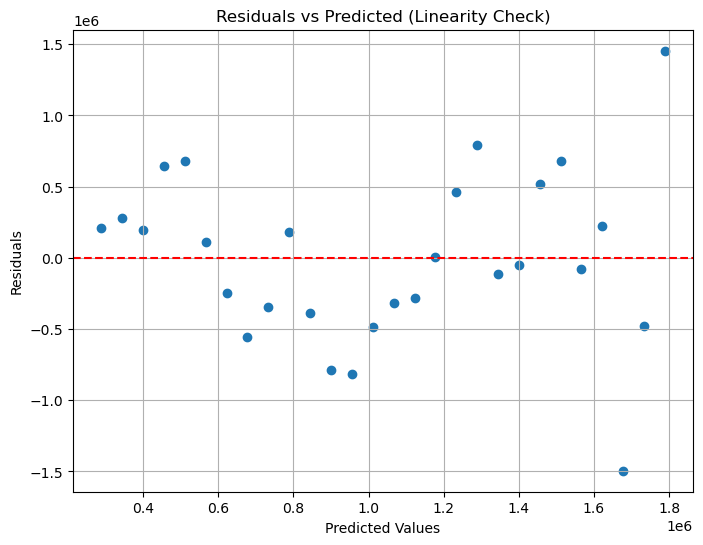

In [34]:
# Predict on full data
y_pred = model.predict(X_const)
residuals = y - y_pred

# Residual Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted (Linearity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
#If residuals are randomly scattered around 0 → Linearity holds.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data
#If VIF < 5, there is no serious multicollinearity.


                 feature       VIF
0             Tariff (%)  7.298867
1  Soyoil Price (USD/MT)  7.298867


In [40]:
"Mean of residuals:", np.mean(residuals)
#Should be close to 0.

('Mean of residuals:', 9.562687150069645e-10)

In [42]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform test
bp_test = het_breuschpagan(residuals, X_const)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))
#If p-value > 0.05, no heteroscedasticity (good).

{'Lagrange multiplier statistic': 8.971795443061641, 'p-value': 0.011266768558697174, 'f-value': 5.893748025605369, 'f p-value': 0.00799829194569818}


In [44]:
from statsmodels.stats.stattools import durbin_watson

dw_statistic = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_statistic)
#If Durbin-Watson ~2, no autocorrelation.

Durbin-Watson statistic: 1.211051934868372


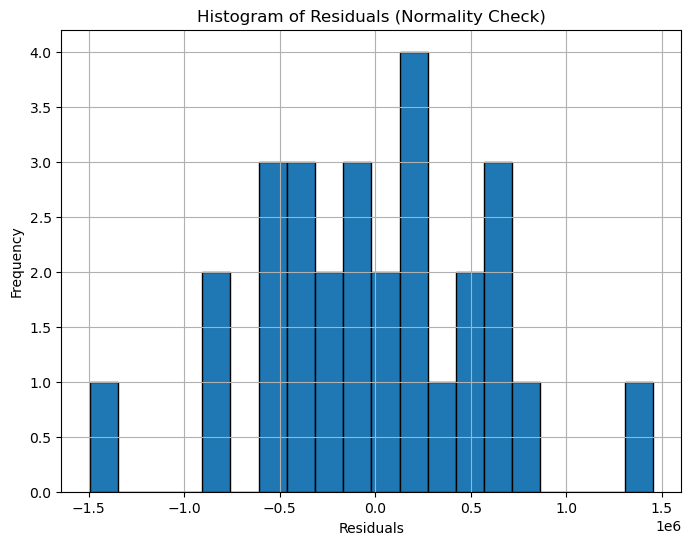

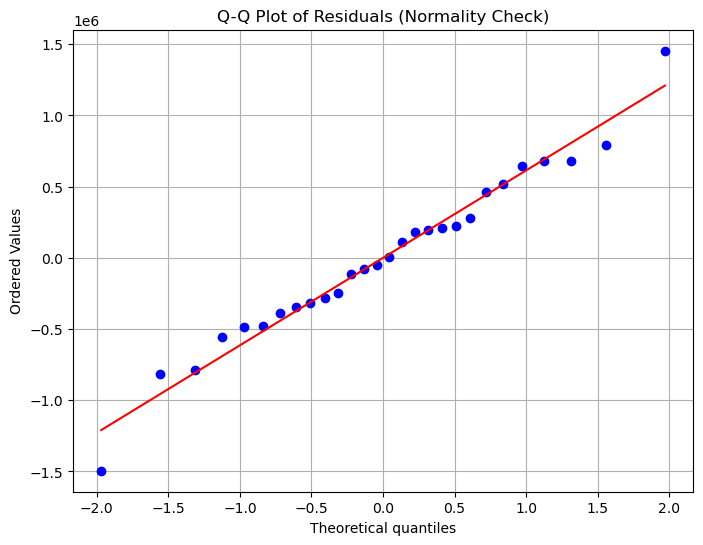

In [46]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals (Normality Check)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q-Q Plot
plt.figure(figsize=(8,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Normality Check)')
plt.grid(True)
plt.show()
#If points lie roughly along the 45° line → Residuals are normally distributed.

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your independent variables are in X
# If you already added constant, remove it here for VIF
X_vif = X.copy()

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)
#VIF ~ 1-5 → OK
	•	VIF > 5 → Warning (maybe high correlation)
	•	VIF > 10 → Serious multicollinearity problem.


                 feature       VIF
0             Tariff (%)  7.298867
1  Soyoil Price (USD/MT)  7.298867


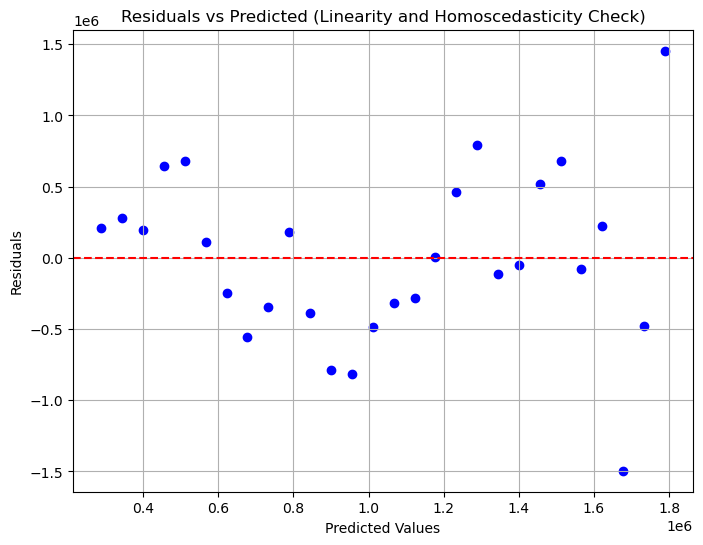

In [59]:
import matplotlib.pyplot as plt

# Predict on full data
y_pred = model.predict(X_const)
residuals = y - y_pred

# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Linearity and Homoscedasticity Check)')
plt.grid(True)
plt.show()
#	If residuals are randomly scattered around zero → Good.
	•	If patterns (like a curve or funnel) → Problem.

In [61]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# Rebuild model using only training data
model_train = sm.OLS(y_train, X_train).fit()

# Print new summary
print(model_train.summary())

#Use X_train and y_train to train model.
	•	Later predict on X_test and compare predictions.


Training samples: 22, Testing samples: 6
                             OLS Regression Results                            
Dep. Variable:     Trade Value 1000USD   R-squared:                       0.520
Model:                             OLS   Adj. R-squared:                  0.469
Method:                  Least Squares   F-statistic:                     10.29
Date:                 Sat, 26 Apr 2025   Prob (F-statistic):           0.000938
Time:                         12:06:21   Log-Likelihood:                -320.39
No. Observations:                   22   AIC:                             646.8
Df Residuals:                       19   BIC:                             650.1
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

                 feature       VIF
0             Tariff (%)  7.298867
1  Soyoil Price (USD/MT)  7.298867


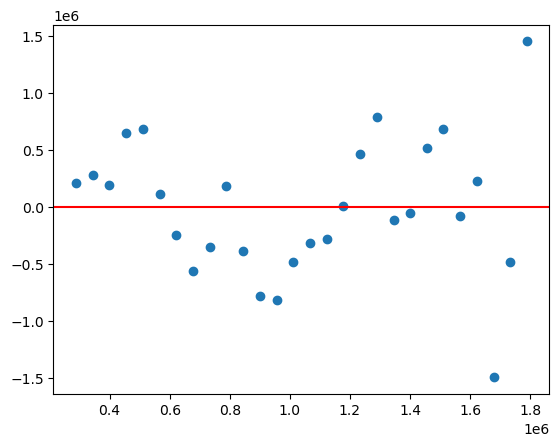

Training samples: 22, Testing samples: 6


In [63]:
# 1. VIF
print(vif_data)

# 2. Residual Plot
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.show()

# 3. Train Test Split
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# 4. (Optional Scaling if Ridge/Lasso)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Fixing Violations of CLRM

In [49]:
robust_model = model.get_robustcov_results(cov_type='HC1')

print(robust_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Trade Value 1000USD   R-squared:                       0.369
Model:                             OLS   Adj. R-squared:                  0.318
Method:                  Least Squares   F-statistic:                     8.696
Date:                 Sat, 26 Apr 2025   Prob (F-statistic):            0.00136
Time:                         11:37:13   Log-Likelihood:                -411.66
No. Observations:                   28   AIC:                             829.3
Df Residuals:                       25   BIC:                             833.3
Df Model:                            2                                         
Covariance Type:                   HC1                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [51]:
# Transform y
y_log = np.log(df['Trade Value 1000USD'])

# Refit model
model_log = sm.OLS(y_log, X_const).fit()
print(model_log.summary())

# Interpretation: Now coefficients explain % changes.

                             OLS Regression Results                            
Dep. Variable:     Trade Value 1000USD   R-squared:                       0.208
Model:                             OLS   Adj. R-squared:                  0.144
Method:                  Least Squares   F-statistic:                     3.276
Date:                 Sat, 26 Apr 2025   Prob (F-statistic):             0.0545
Time:                         11:39:45   Log-Likelihood:                -33.047
No. Observations:                   28   AIC:                             72.09
Df Residuals:                       25   BIC:                             76.09
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [53]:
# Newey-West robust standard errors
hac_model = model.get_robustcov_results(cov_type='HAC', maxlags=1)

print(hac_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Trade Value 1000USD   R-squared:                       0.369
Model:                             OLS   Adj. R-squared:                  0.318
Method:                  Least Squares   F-statistic:                     7.115
Date:                 Sat, 26 Apr 2025   Prob (F-statistic):            0.00358
Time:                         11:43:45   Log-Likelihood:                -411.66
No. Observations:                   28   AIC:                             829.3
Df Residuals:                       25   BIC:                             833.3
Df Model:                            2                                         
Covariance Type:                   HAC                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [55]:
# Drop the variable with highest VIF if needed
X_reduced = df[['Tariff (%)']]  # or only Soyoil Price
X_reduced_const = sm.add_constant(X_reduced)
model_reduced = sm.OLS(y, X_reduced_const).fit()

print(model_reduced.summary())

                             OLS Regression Results                            
Dep. Variable:     Trade Value 1000USD   R-squared:                       0.262
Model:                             OLS   Adj. R-squared:                  0.233
Method:                  Least Squares   F-statistic:                     9.214
Date:                 Sat, 26 Apr 2025   Prob (F-statistic):            0.00540
Time:                         11:43:55   Log-Likelihood:                -413.86
No. Observations:                   28   AIC:                             831.7
Df Residuals:                       26   BIC:                             834.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.897e+06   6.25e+05      4.63